# First test of a simulation run

In [8]:
import igraph
from scipy.io import mmread
import numpy as np
from dissim.igraph_util import nodes_from_igraph, colors_from_nodes
from dissim.main import propagate, DSState, SISModel
from dissim.rng import SimpleRNG

In [9]:
matrix = mmread("/home/rkingan/winhome/Documents/dev/src/sandra-math5001-2022/soc-karate.mtx")

Vertices: 34, Edges: 78


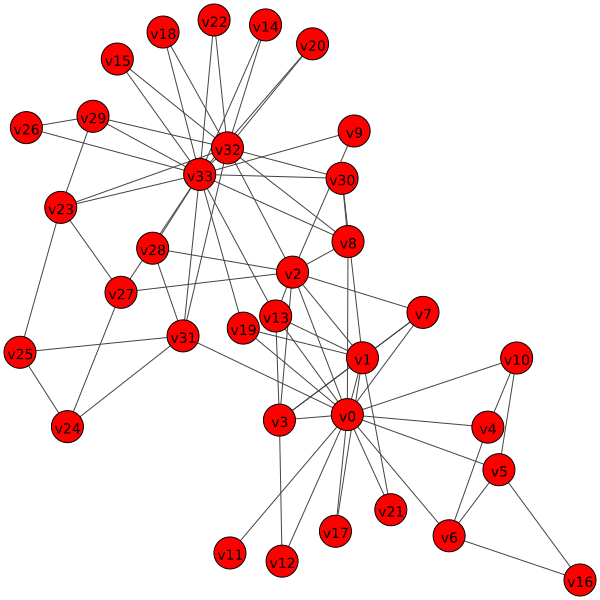

In [10]:
adj = matrix.todense()
G = igraph.Graph.Adjacency(adj > 0).as_undirected()
n = len(G.vs)
m = len(G.es)
G.vs["label"] = [f"v{i}" for i in range(n)]
print(f"Vertices: {n}, Edges: {m}")

igraph.plot(G, vertex_size=32, bbox=(600, 600))

## First simulation

Vertex v0 will be "patient zero". Iterate through 50 days.

In [11]:
initial_states = [DSState.UNEXPOSED] * n
initial_states[0] = DSState.INFECTED
initial_states[33] = DSState.VACCINATED
initial_states[2] = DSState.VACCINATED
initial_states[8] = DSState.VACCINATED
initial_states[13] = DSState.VACCINATED
nodes = nodes_from_igraph(G, initial_states)
ps = 0.06
pd = 0.08
rng = SimpleRNG(42)
model = SISModel(ps, pd, rng)

In [12]:
for t in range(50):
    propagate(nodes, model)

In [13]:
t = -1

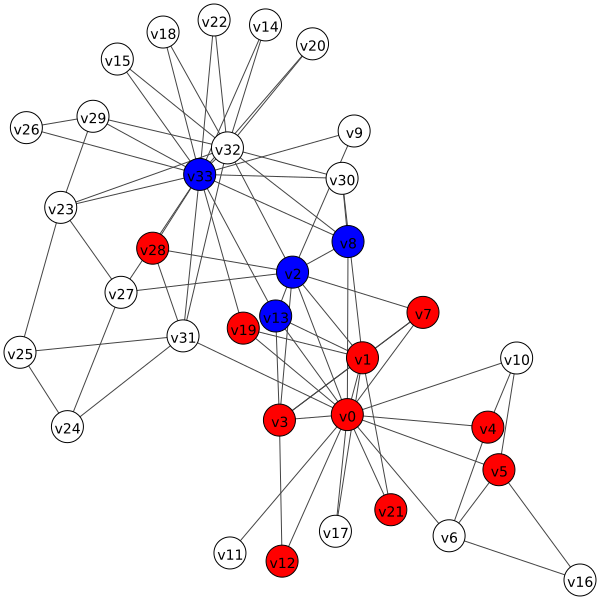

In [24]:
t += 1
colors = colors_from_nodes(nodes, t)
igraph.plot(G, bbox=(600, 600), vertex_color=colors, vertex_size=32)

In [25]:
from dissim.centrality import compute_spread_centrality_of_graph

In [26]:
ss = compute_spread_centrality_of_graph(G)

In [27]:
ss

array([0.56848463, 0.38895358, 0.63396868, 0.25505021, 0.03549651,
       0.03759123, 0.03759123, 0.17707046, 0.3461775 , 0.06942374,
       0.03549651, 0.01836298, 0.04536306, 0.3318216 , 0.0658857 ,
       0.0658857 , 0.00354607, 0.05465737, 0.0658857 , 0.14426146,
       0.0658857 , 0.05465737, 0.0658857 , 0.13256322, 0.02035482,
       0.02187294, 0.03649086, 0.11235288, 0.11168144, 0.10913376,
       0.19754951, 0.2272046 , 0.48545422, 0.63766296])

In [28]:
colors

['red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'white',
 'red',
 'blue',
 'white',
 'white',
 'white',
 'red',
 'blue',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'blue']